https://github.com/ogrisel/sklearn_pycon2014/blob/master/notebooks/03_basic_principles.ipynb
03_basic_principles.ipynb

# Basic Principles Of Machine Learning
Material Covered In This Section 
- Basic Categories Of Supervised Learning, Including Classification And Regression Problems
- Basic Categories Of Unsupervised Learning, Including Dimensionality Reduction And Clustering.
- Basic Syntax Of The Scikit-Learn Estimator Interface.
- Know Why Data Should Be Split Into A Training Set And Test Set

# Definition Of Machine Learning
- Machine Learning (Ml) Is About Building Programs With Tunable Parameters (Typically An Array Of Floating Point Values) That Are Adjusted Automatically So As To Improve Their Behavior By Adapting To Previously Seen Data.
- In Most Ml Applications, The Data Is In A 2D Array Of Shape [N_Samples X N_Features], Where The Number Of Features Is The Same For Each Object, And Each Feature Column Refers To A Related Piece Of Information About Each Sample.
- Machine Learning Can Be Broken Into Two Broad Regimes: Supervised Learning And Unsupervised Learning. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
lin_reg = LinearRegression(normalize=True)
print (lin_reg.normalize) # If True, The Regressors X Will Be Normalized Before Regression
print (lin_reg)

True
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [4]:
observations = np.array([0, 3, 6, 9, 12])
features = np.array([0, 2, 4, 6, 8])

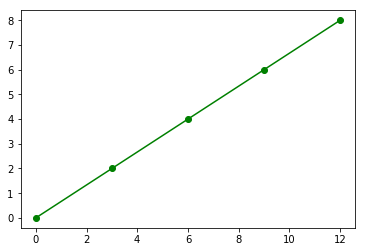

In [5]:
plt.plot(observations, features, marker = 'o', color = "g");

In [6]:
# 2-D Array With 5 Observations And 1 Feature
# [:, np.newaxis] # Rearrange The Array 
observations = observations[:, np.newaxis] 
observations

array([[ 0],
       [ 3],
       [ 6],
       [ 9],
       [12]])

In [7]:
lin_reg.fit(observations, features) # Fit Data Into Model 
lin_reg.coef_ # Slope Coefficient Of The Model 

array([ 0.66666667])

# Classification ~ kNN
K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

In [8]:
from sklearn import neighbors, datasets
iris_data = datasets.load_iris()
observations, features = iris_data.data, iris_data.target
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(observations, features)

print (iris_data.target_names[knn.predict([[5, 1.5, 3.5, 1]])])

['versicolor']


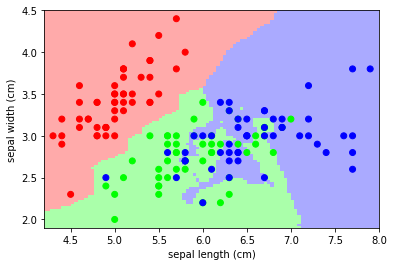

In [9]:
# Plot Of The Sepal Space Measurements And The Prediction Of The Flower Using KNN
from fig_code import plot_iris_classification
plot_iris_classification(neighbors.KNeighborsClassifier, n_neighbors = 3)

In [10]:
from sklearn.svm import SVC
iris_measurements = [[5, 1.5, 3.5, 1]]

In [11]:
classifier = SVC()
classifier.fit(observations, features) 
print(classifier.predict(iris_measurements))

[1]


# Regression

In [12]:
# Creating Data
np.random.seed(0) # np.random.seed ~ Ensures Output Of Random Numbers Remain The Same
observations = np.random.random(size=(36,1)) # 36 Observations
features = 5 * observations.squeeze() + 1 + np.random.normal(size=36)
# squeeze() ~ Remove Single-Dimensional Entries From The Shape Of An Array.

# print(observations)
# print(features)

In [13]:
# Fit A Linear Regression To The Data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(observations, features)
# %.5f ~ Formatting String: Round To 2 Places After Decimal Point
print ("Model coefficient: %.2f; Model Intercept: %.2f" \
       % (lin_reg.coef_, lin_reg.intercept_))

Model coefficient: 5.07; Model Intercept: 0.71


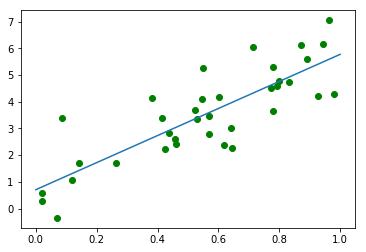

In [14]:
# Plot Data And Model Prediction
observations_test = np.linspace(0, 1, 100)[:, np.newaxis] 
features_test = lin_reg.predict(observations_test) # Predict Answers
import pylab as pl
plt.plot(observations.squeeze(), features, 'go')
plt.plot(observations_test.squeeze(), features_test);

# Unsupervised Learning
Unsupervised Learning is used for data that has no labels, and we are interested in finding similarities between the objects in question. Unsupervised learning comprises tasks such as dimensionality reduction, clustering, and density estimation. 
- Some more involved unsupervised learning problems are:
    - given detailed observations of distant galaxies, determine which features or combinations of features summarize best the information.
    - given a mixture of two sound sources (for example, a person talking over some music), separate the two (this is called the blind source separation problem).
    - given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.
- Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful features in heterogeneous data, and then these features can be used within a supervised framework.

# Dimensionality Reduction
- Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance. (e.g. PCA for visualization)
- Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We extract 2 combinations of sepal and petal dimensions to visualize it:

In [15]:
observations, target = iris_data.data, iris_data.target
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # Set To 2 Components 
pca.fit(observations) # Fit The Model With Observations
observations_reduced = pca.transform(observations) # .transform(observations) ~ Apply Dimensionality Reduction 
print("Reduced DataSet Shape:", observations_reduced.shape)

Reduced DataSet Shape: (150, 2)


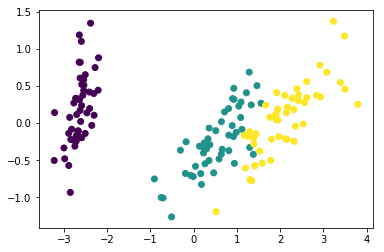

In [16]:
# Plot Target Of The Observations
plt.scatter(observations_reduced[:, 0], observations_reduced[:, 1], c = target);

In [17]:
# print(observations_reduced)

In [18]:
# print(target)

In [19]:
import pandas as pd
data = np.array(pca.components_)
x = pd.DataFrame(data)
x.columns = ["Sepal Length (cm)", "Sepal Width (cm)","Petal Length (cm)","Petal Width (cm)"]
print(x)

   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)
0            0.36159         -0.082269           0.856572          0.358844
1            0.65654          0.729712          -0.175767         -0.074706


In [20]:
print ("Meaning Of The 2 Components:")
for component in pca.components_:
    print (" + ".join("%.2f x %s" % (value, name)
                     for value, name in zip(component, iris_data.feature_names)))

Meaning Of The 2 Components:
0.36 x sepal length (cm) + -0.08 x sepal width (cm) + 0.86 x petal length (cm) + 0.36 x petal width (cm)
0.66 x sepal length (cm) + 0.73 x sepal width (cm) + -0.18 x petal length (cm) + -0.07 x petal width (cm)


# Clustering ~ Kmeans
- Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.
- Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.

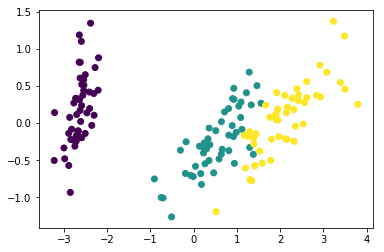

In [21]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=1)
k_means.fit(observations_reduced) # Fit Observation For Clustering 
y_pred = k_means.predict(observations_reduced) # Predict The Data
 # Scatter Plot For First and Second Feature Of Iris Data Set
plt.scatter(observations_reduced[:, 0], observations_reduced[:, 1], c=target);

# Scikit-learn's estimator interface
Scikit-learn strives to have a uniform interface across all methods. 
- Given a scikit-learn estimator object named model, the following methods are available:
    - Available in all Estimators 
        - model.fit() : fit training data. 
            - For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). 
            - For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).
    - Available in supervised estimators
        - model.predict() : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array.
        - model.predict_proba() : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().
        - model.score() : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.
    - Available in unsupervised estimators
        - model.transform() : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
        - model.fit_transform() : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

# Measuring Performance
An important piece of machine learning is model validation: Determining how well your model will generalize from the training data to future unlabeled data. The nearest neighbor classifier is a simple classifier: it simply stores all training data, and for any unknown quantity, simply returns the label of the closest training point.

In [22]:
# Return The Correct Prediction For Each Of The Input Points When n_neighbors = 1:
from sklearn.neighbors import KNeighborsClassifier
observations, target = iris_data.data, iris_data.target
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(observations, target)
target_prediction = classifier.predict(observations)
print(np.all(target == target_prediction))

True


In [23]:
# Viewing Results Using The Confusion Matrix, Or The Matrix Showing The Frequency Of Inputs And Outputs:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target, target_prediction))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


- For each class, all 50 training samples are correctly identified. 
- However this model generalizes extremely poorly to new data. 
- We can simulate this by splitting our data into a training set and a testing set. 

In [24]:
from sklearn.cross_validation import train_test_split
observations_train, observations_test, target_train, target_test = train_test_split(observations, target)
classifier.fit(observations_train, target_train)
target_prediction = classifier.predict(observations_test)
print(confusion_matrix(target_test, target_prediction))

[[11  0  0]
 [ 0 13  1]
 [ 0  1 12]]


/Users/kerrylam/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


%run fig_code/svm_gui.py


In [25]:
#!python fig_code/svm_gui.py


Libsvm GUI

A simple graphical frontend for Libsvm mainly intended for didactic
purposes. You can create data points by point and click and visualize
the decision region induced by different kernels and parameter settings.

To create positive examples click the left mouse button; to create
negative examples click the right button.

If all examples are from the same class, it uses a one-class SVM.


